In [59]:
from utils import *

In [60]:
velocities = {
    0.1: 536311,
    0.5: 536312,
    0.9: 536313,
    1.1: 536314,
    1.5: 536315,
    1.9: 536316,
}
# note to nick, copy this ipython notebook and then do the analysis with these as velocities
reset_velocities = {
    0.1: 536311,
    0.5: 536312,
    0.9: 536313,
    1.1: 536314,
    1.5: 536315,
    1.9: 536316,
}

In [61]:
import os

paths = {}
for (vel, job) in velocities.items():
    paths[vel] = f"/tmp/log{job}.json"

for (vel, job) in velocities.items():
    path = paths[vel]
    x = os.system(f"scp lando@sc.stanford.edu:/tiger/u/lando/cmeta/v{vel}/{job}/log.json {path}")
    assert x == 0
    print(f"Loaded Job {job} Log")

Loaded Job 536311 Log
Loaded Job 536312 Log
Loaded Job 536313 Log
Loaded Job 536314 Log
Loaded Job 536315 Log
Loaded Job 536316 Log


In [62]:
lines = {}

for vel in velocities:
    lines[vel] = read_log(paths[vel])
    print(f"Found {len(lines[vel])} lines for velocity {vel}")

Found 4250 lines for velocity 0.1
Found 4293 lines for velocity 0.5
Found 4285 lines for velocity 0.9
Found 4288 lines for velocity 1.1
Found 4250 lines for velocity 1.5
Found 4222 lines for velocity 1.9


In [63]:
warms = {}
slbos = {}

for vel in velocities:
    warm, slbo = extract_rewards(lines[vel])
    warms[vel] = warm
    slbos[vel] = slbo
    print(f"Velocity {vel} has started {len(warms[vel])} warmups")
    print(f"Velocity {vel} first warmup has {len(warms[vel][0])} iters")
    print(f"Velocity {vel} has started {len(slbos[vel][0])} stages\n")

Velocity 0.1 has started 1 warmups
Velocity 0.1 first warmup has 3200 iters
Velocity 0.1 has started 1 stages

Velocity 0.5 has started 1 warmups
Velocity 0.5 first warmup has 3200 iters
Velocity 0.5 has started 1 stages

Velocity 0.9 has started 1 warmups
Velocity 0.9 first warmup has 3200 iters
Velocity 0.9 has started 1 stages

Velocity 1.1 has started 1 warmups
Velocity 1.1 first warmup has 3200 iters
Velocity 1.1 has started 1 stages

Velocity 1.5 has started 1 warmups
Velocity 1.5 first warmup has 3200 iters
Velocity 1.5 has started 1 stages

Velocity 1.9 has started 1 warmups
Velocity 1.9 first warmup has 3200 iters
Velocity 1.9 has started 1 stages



In [64]:
real_warms, virt_warms = {}, {}

for vel in velocities:
    rw, vr = get_warmup(lines[vel])
    real_warms[vel] = rw
    virt_warms[vel] = vr
    print(f"Velocity {vel} has {len(real_warms[vel])} warmup iters")

Velocity 0.1 has 79 warmup iters
Velocity 0.5 has 79 warmup iters
Velocity 0.9 has 79 warmup iters
Velocity 1.1 has 79 warmup iters
Velocity 1.5 has 79 warmup iters
Velocity 1.9 has 79 warmup iters


In [69]:
real_rewards = {}
virt_rewards = {}

for vel in velocities:
    real, virt = get_checkpoints(lines[vel])
    real_rewards[vel] = real
    virt_rewards[vel] = virt
    
print(len(real_rewards[0.1]))

1


In [66]:
mins = {
    0.1: -233.78927811594411, 
    0.5: -411.35567527732564, 
    0.9: -610.8872788980733, 
    1.1: -710.8872788980734, 
    1.5: -910.8872788980736, 
    1.9: -1110.8872788980734,
}
maxs = {
    0.1: -3.5636334132798204, 
    0.5: -10.710668525449655, 
    0.9: -30.98072317031702, 
    1.1: -44.14465103596886, 
    1.5: -51.02850590038164, 
    1.9: -61.263854017466976
}

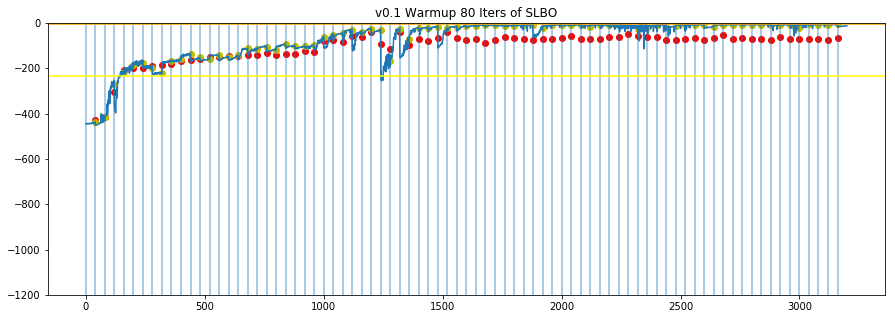

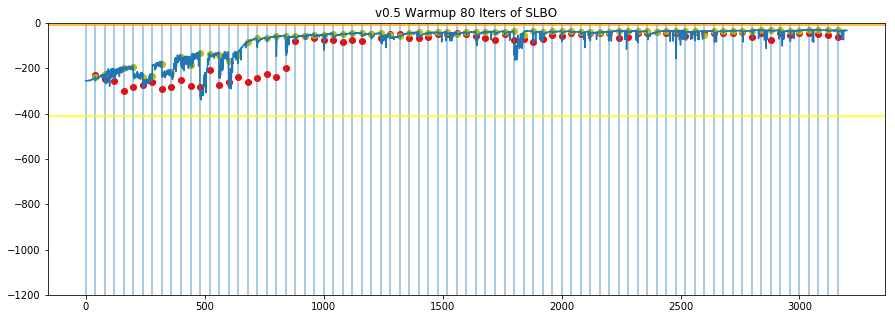

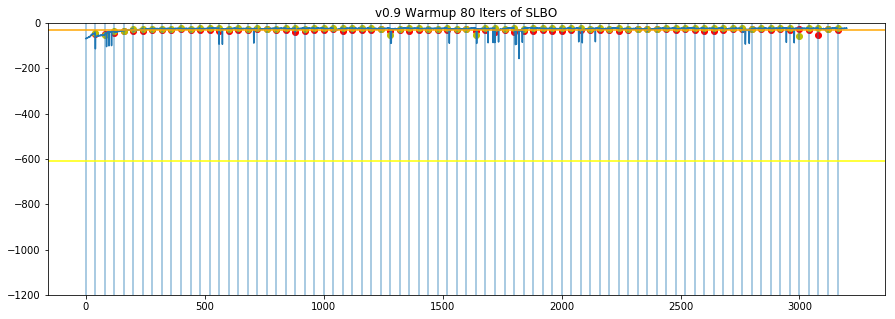

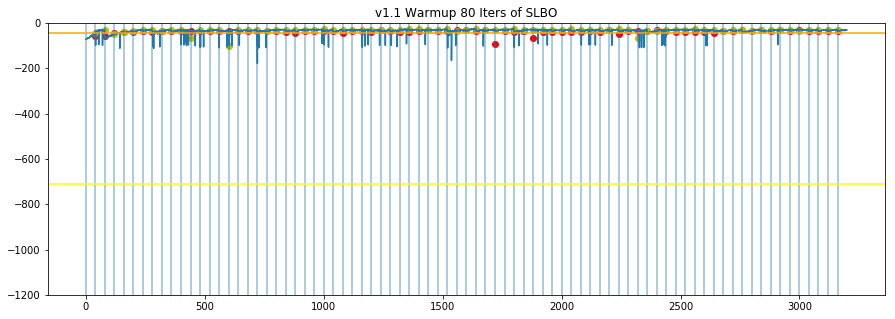

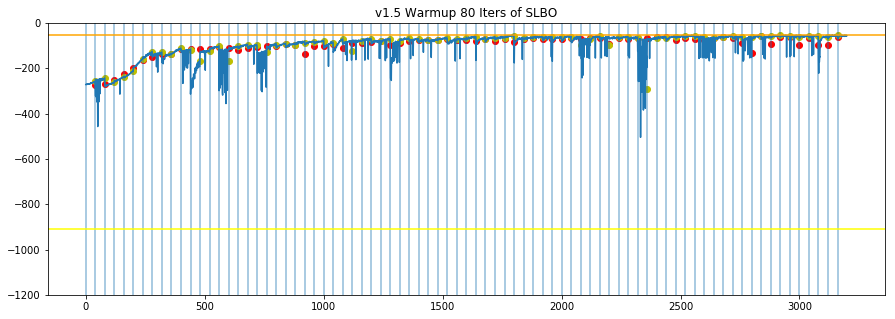

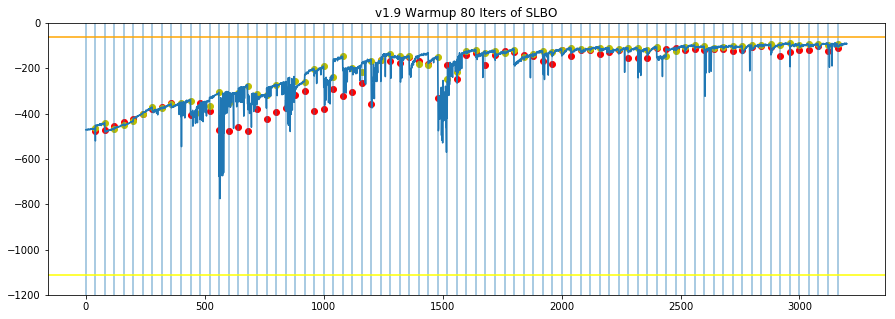

In [67]:
for vel in velocities:
    fig, ax = plt.subplots(figsize=(15, 5))
    
    plot_stage(ax, warms[vel][0], 80, 40)
    warm_iters = len(real_warms[vel])
    ax.scatter([(i+1)*40 for i in range(0, warm_iters)], real_warms[vel], color="r")
    ax.scatter([(i+1)*40 for i in range(0, warm_iters)], virt_warms[vel], color="y")
    ax.set_title(f"v{vel} Warmup 80 Iters of SLBO")
    ax.axhline(y=mins[vel], color="yellow")
    ax.axhline(y=maxs[vel], color="orange")
    ax.set_ylim((-1200, 0))

TypeError: 'AxesSubplot' object does not support indexing

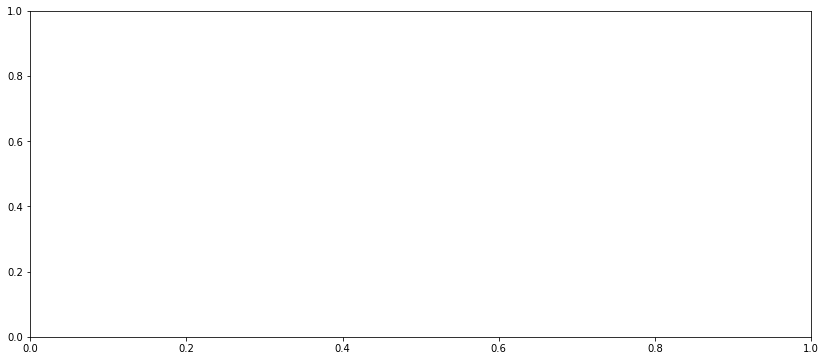

In [82]:
plot_stages(slbos[0.1][0], 20, 40)

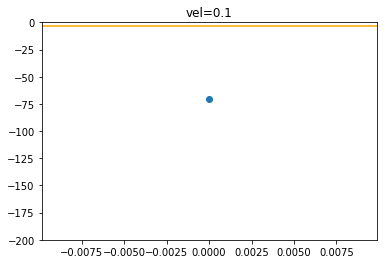

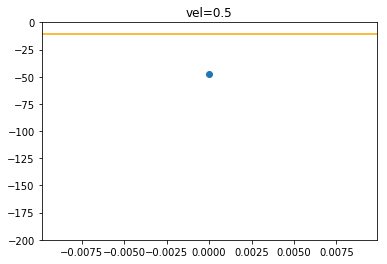

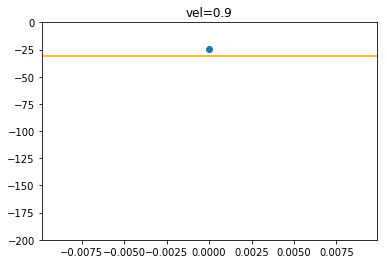

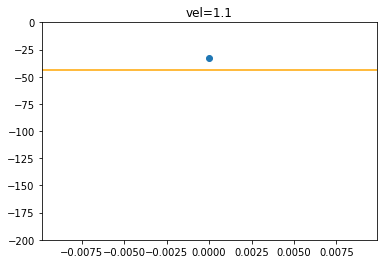

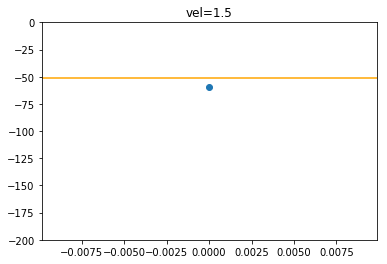

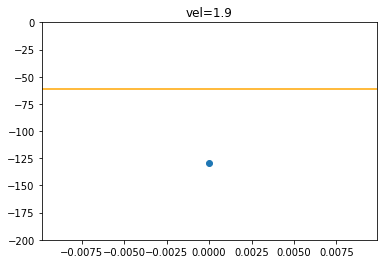

In [76]:
for vel in real_rewards:
    fig, ax = plt.subplots()
    ax.scatter([i for i in range(len(real_rewards[vel]))], real_rewards[vel], label=f"vel={vel}")
    ax.set_title(f"vel={vel}")
    ax.axhline(y=mins[vel], color="yellow")
    ax.axhline(y=maxs[vel], color="orange")
    ax.set_ylim(-200, 0)

In [21]:
for i in range(1, 6):
    print(i)

1
2
3
4
5
